/Users/patrick/Documents/Projects/ECE4191-E5-tennibot
Not running on Raspberry Pi. GPIO library not imported.
Not running on Raspberry Pi. GPIO library not imported.
Logger name: robot_core.orchestration.orchestrator_mp.Orchestrator
Logger level: 0
Logger handlers: []
Logger parent: <RootLogger root (INFO)>
Coordinator Process (PID: 95493) running with: 13 threads
************ New scan point: PositionData(x=-2.0, y=2.0, th=2.356194490192345, is_ball=False)


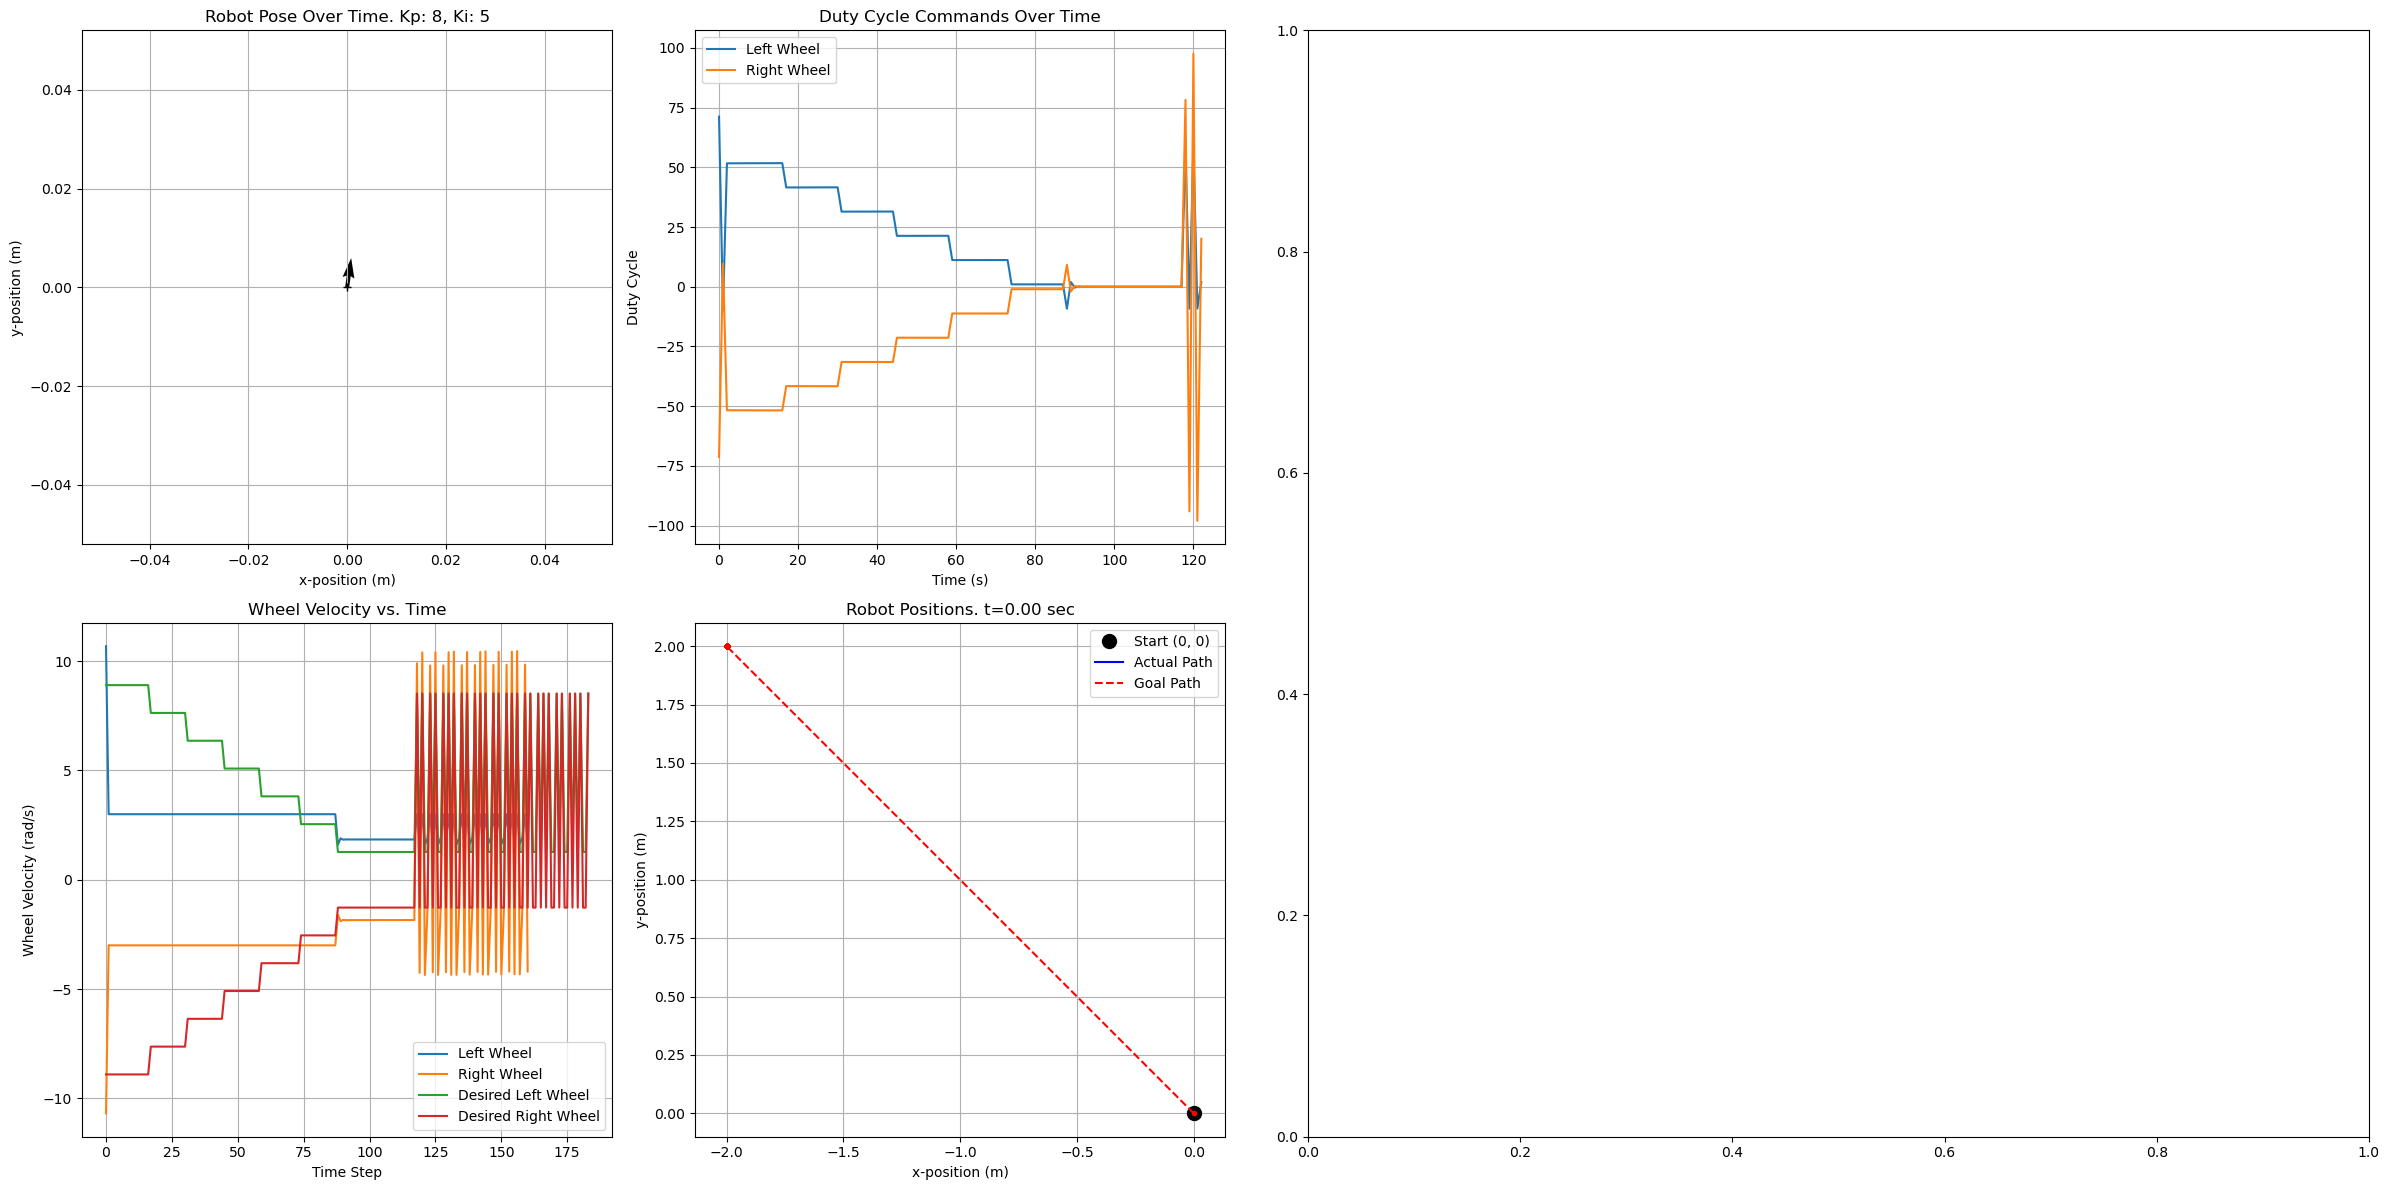

************ New scan point: Scanning point reached: -2.0, 2.0
Scanning point incremented: 1
************ New scan point: PositionData(x=-2.0, y=4.0, th=1.6080429208684544, is_ball=False)


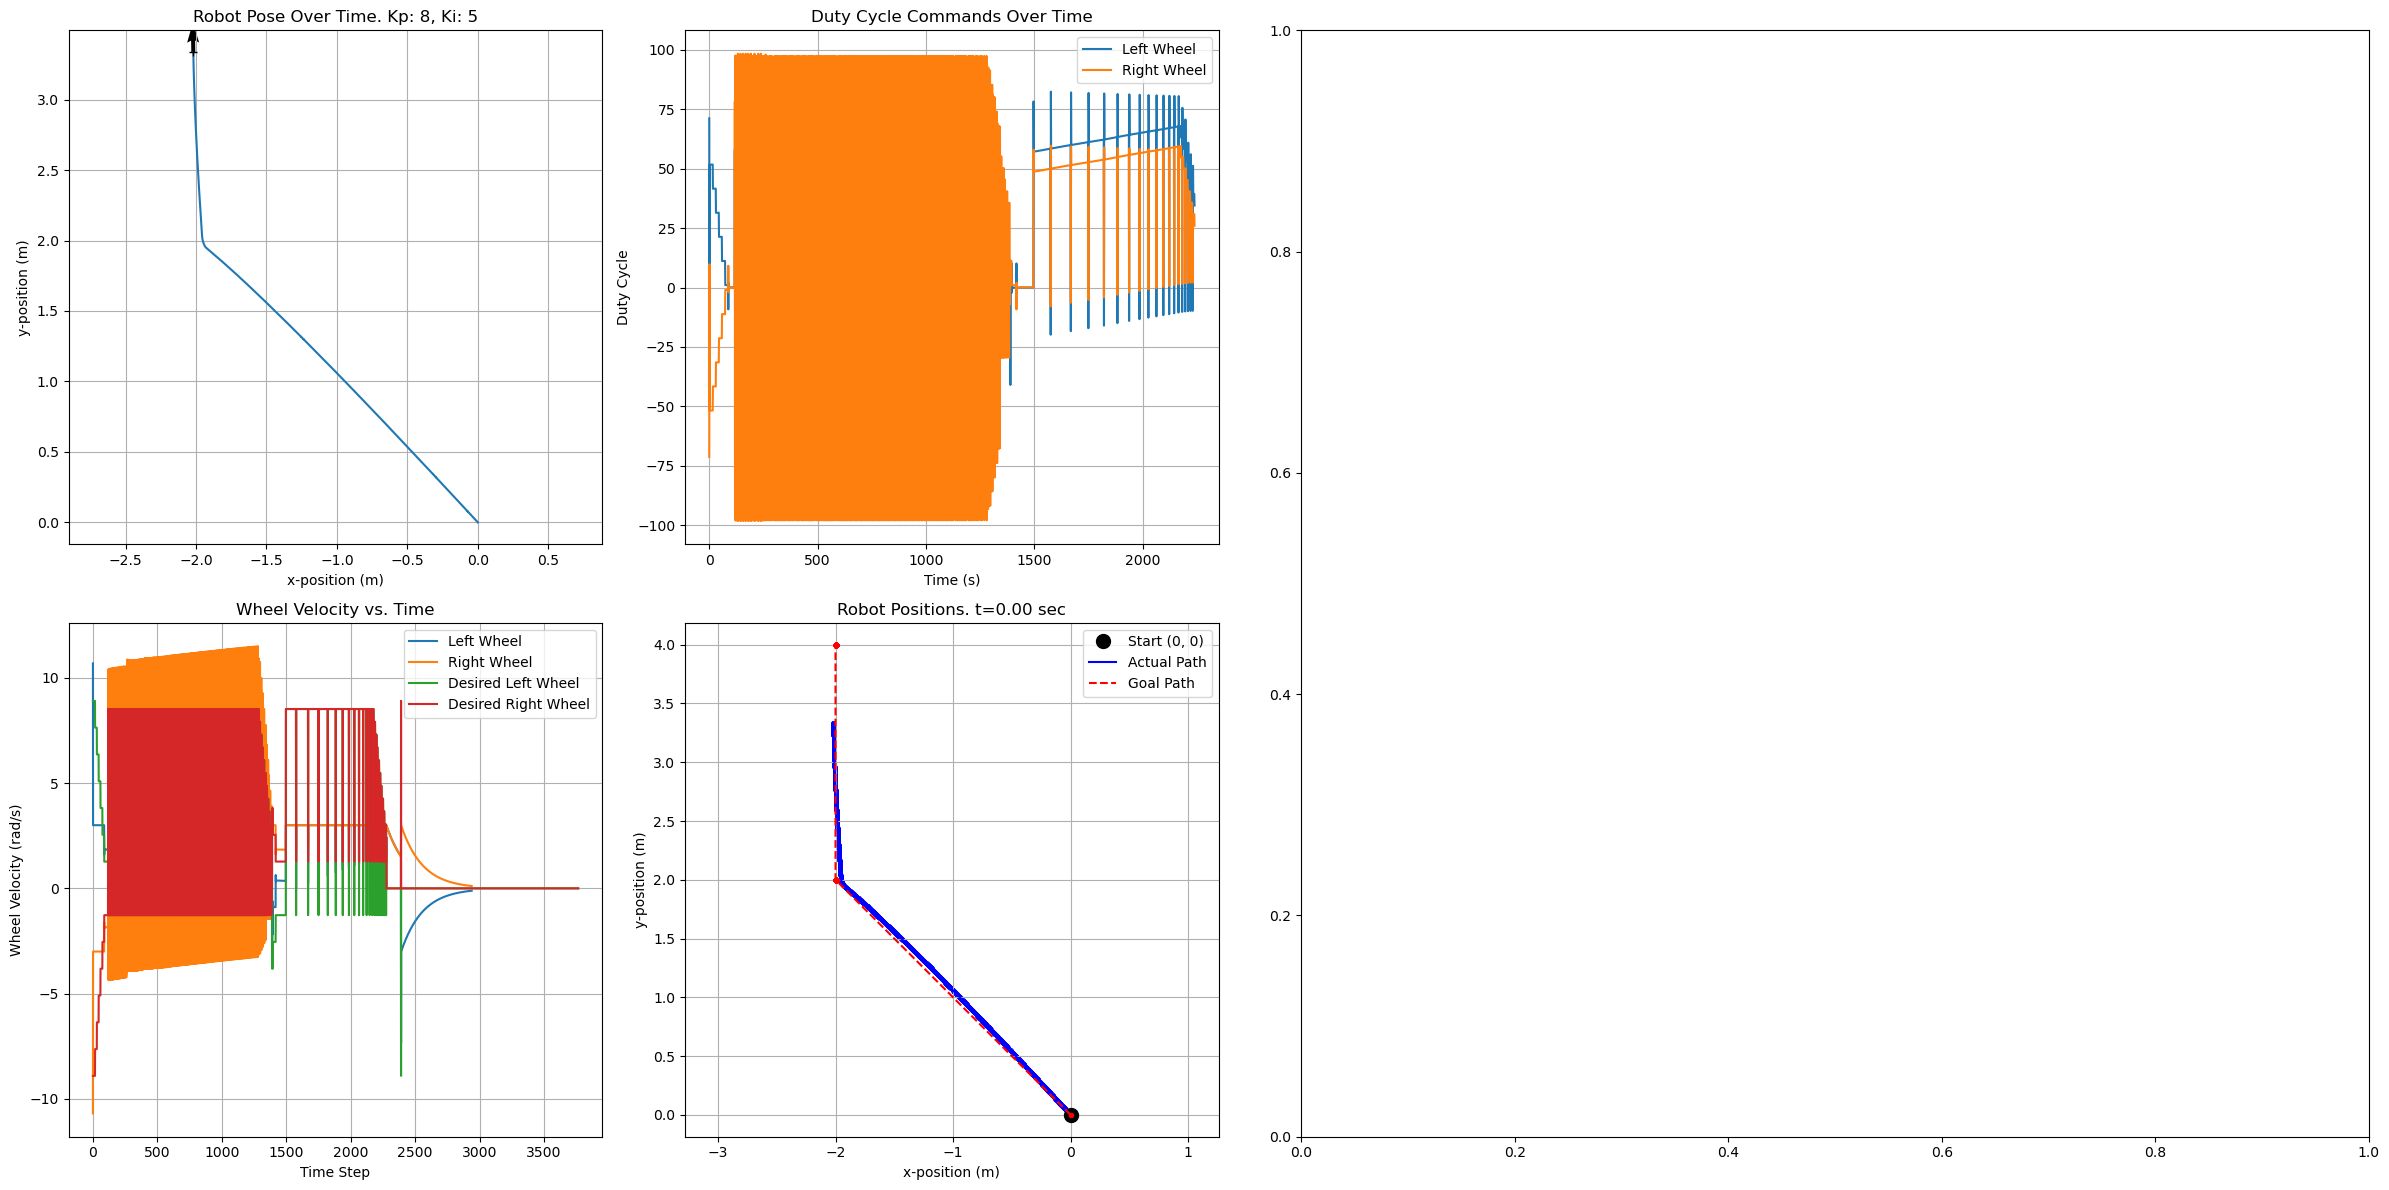

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x1481f8b80>
Traceback (most recent call last):
  File "/Users/patrick/miniconda3/envs/random-tools/lib/python3.12/site-packages/matplotlib/transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))

KeyboardInterrupt: 


Orchestrator Process (PID: 95502) running with: 10 threads
    Initialised simulated robot.
************ Orchestrator: New goal received! PositionData(x=-2.0, y=2.0, th=2.356194490192345, is_ball=False)
************ Orchestrator: New goal received! PositionData(x=-2.0, y=4.0, th=1.6080429208684544, is_ball=False)


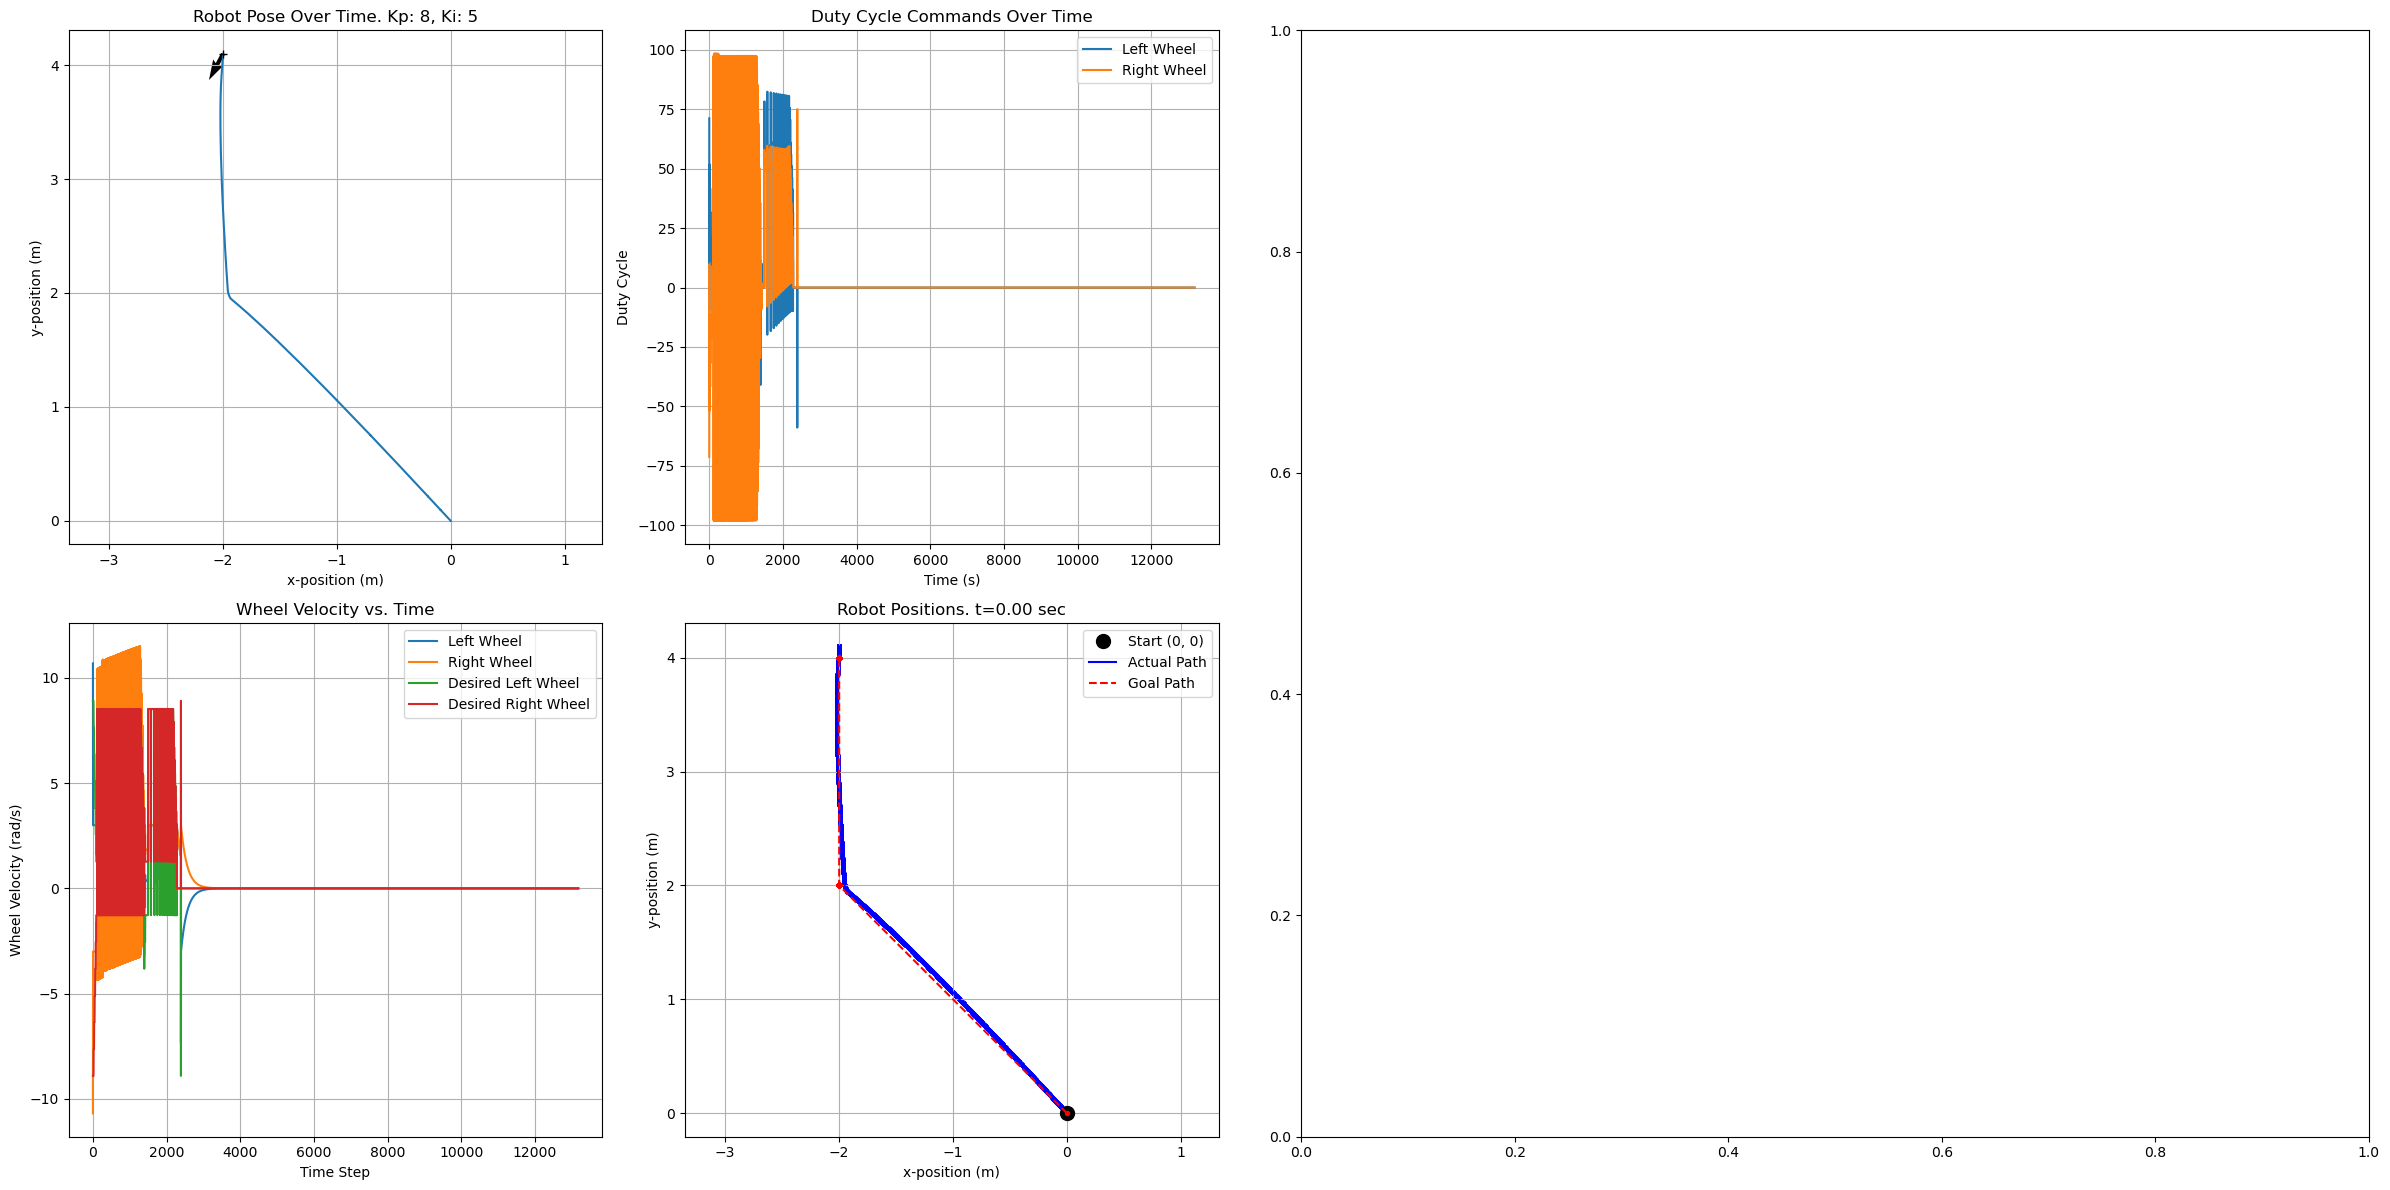

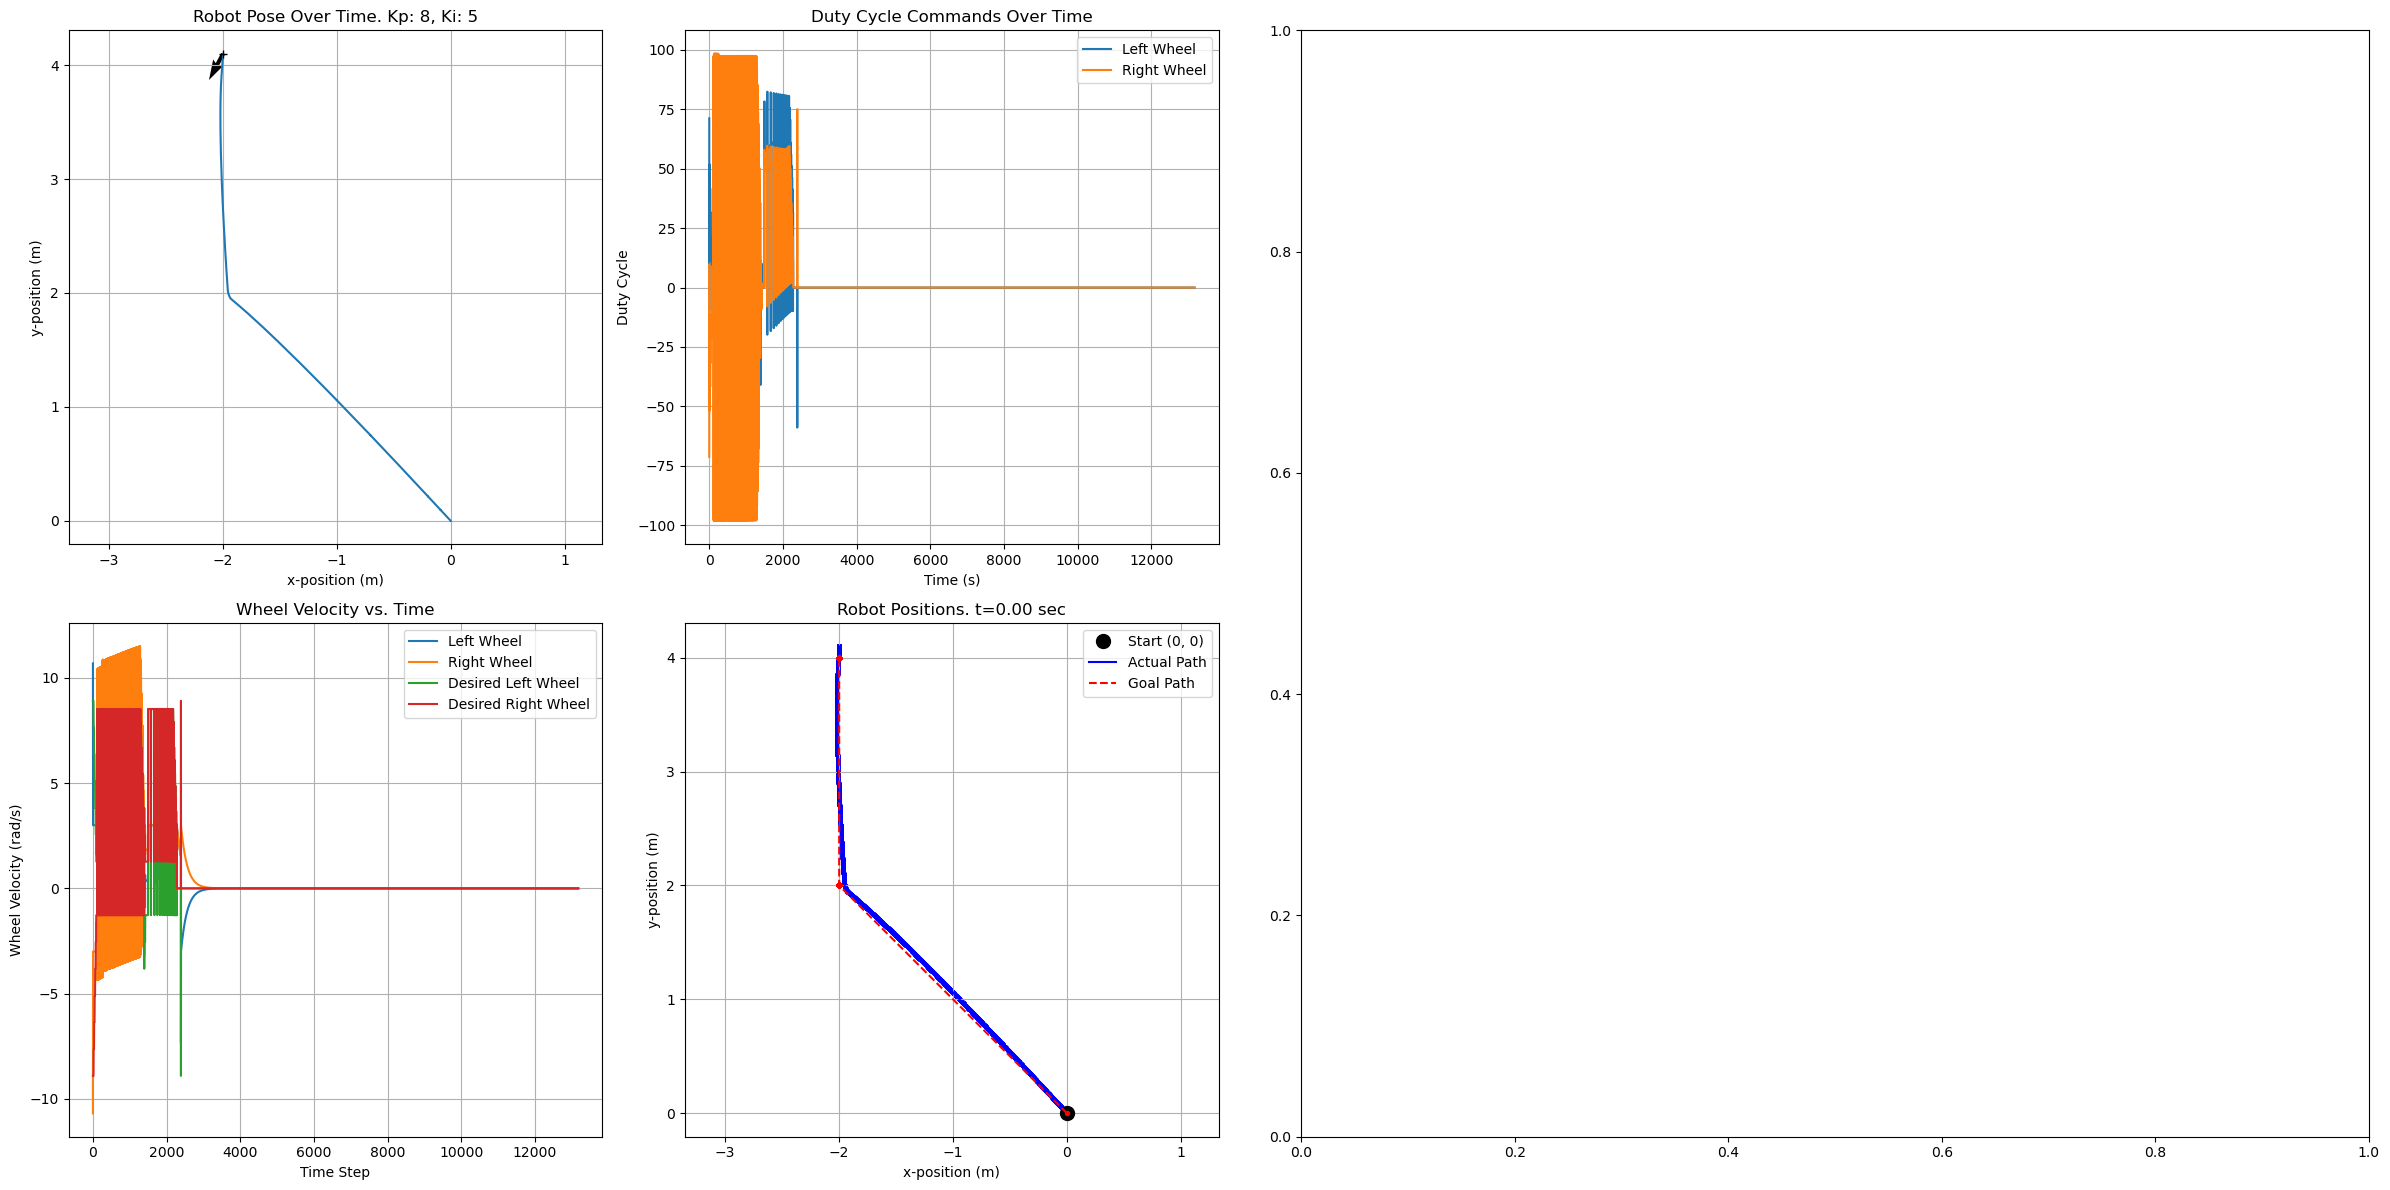

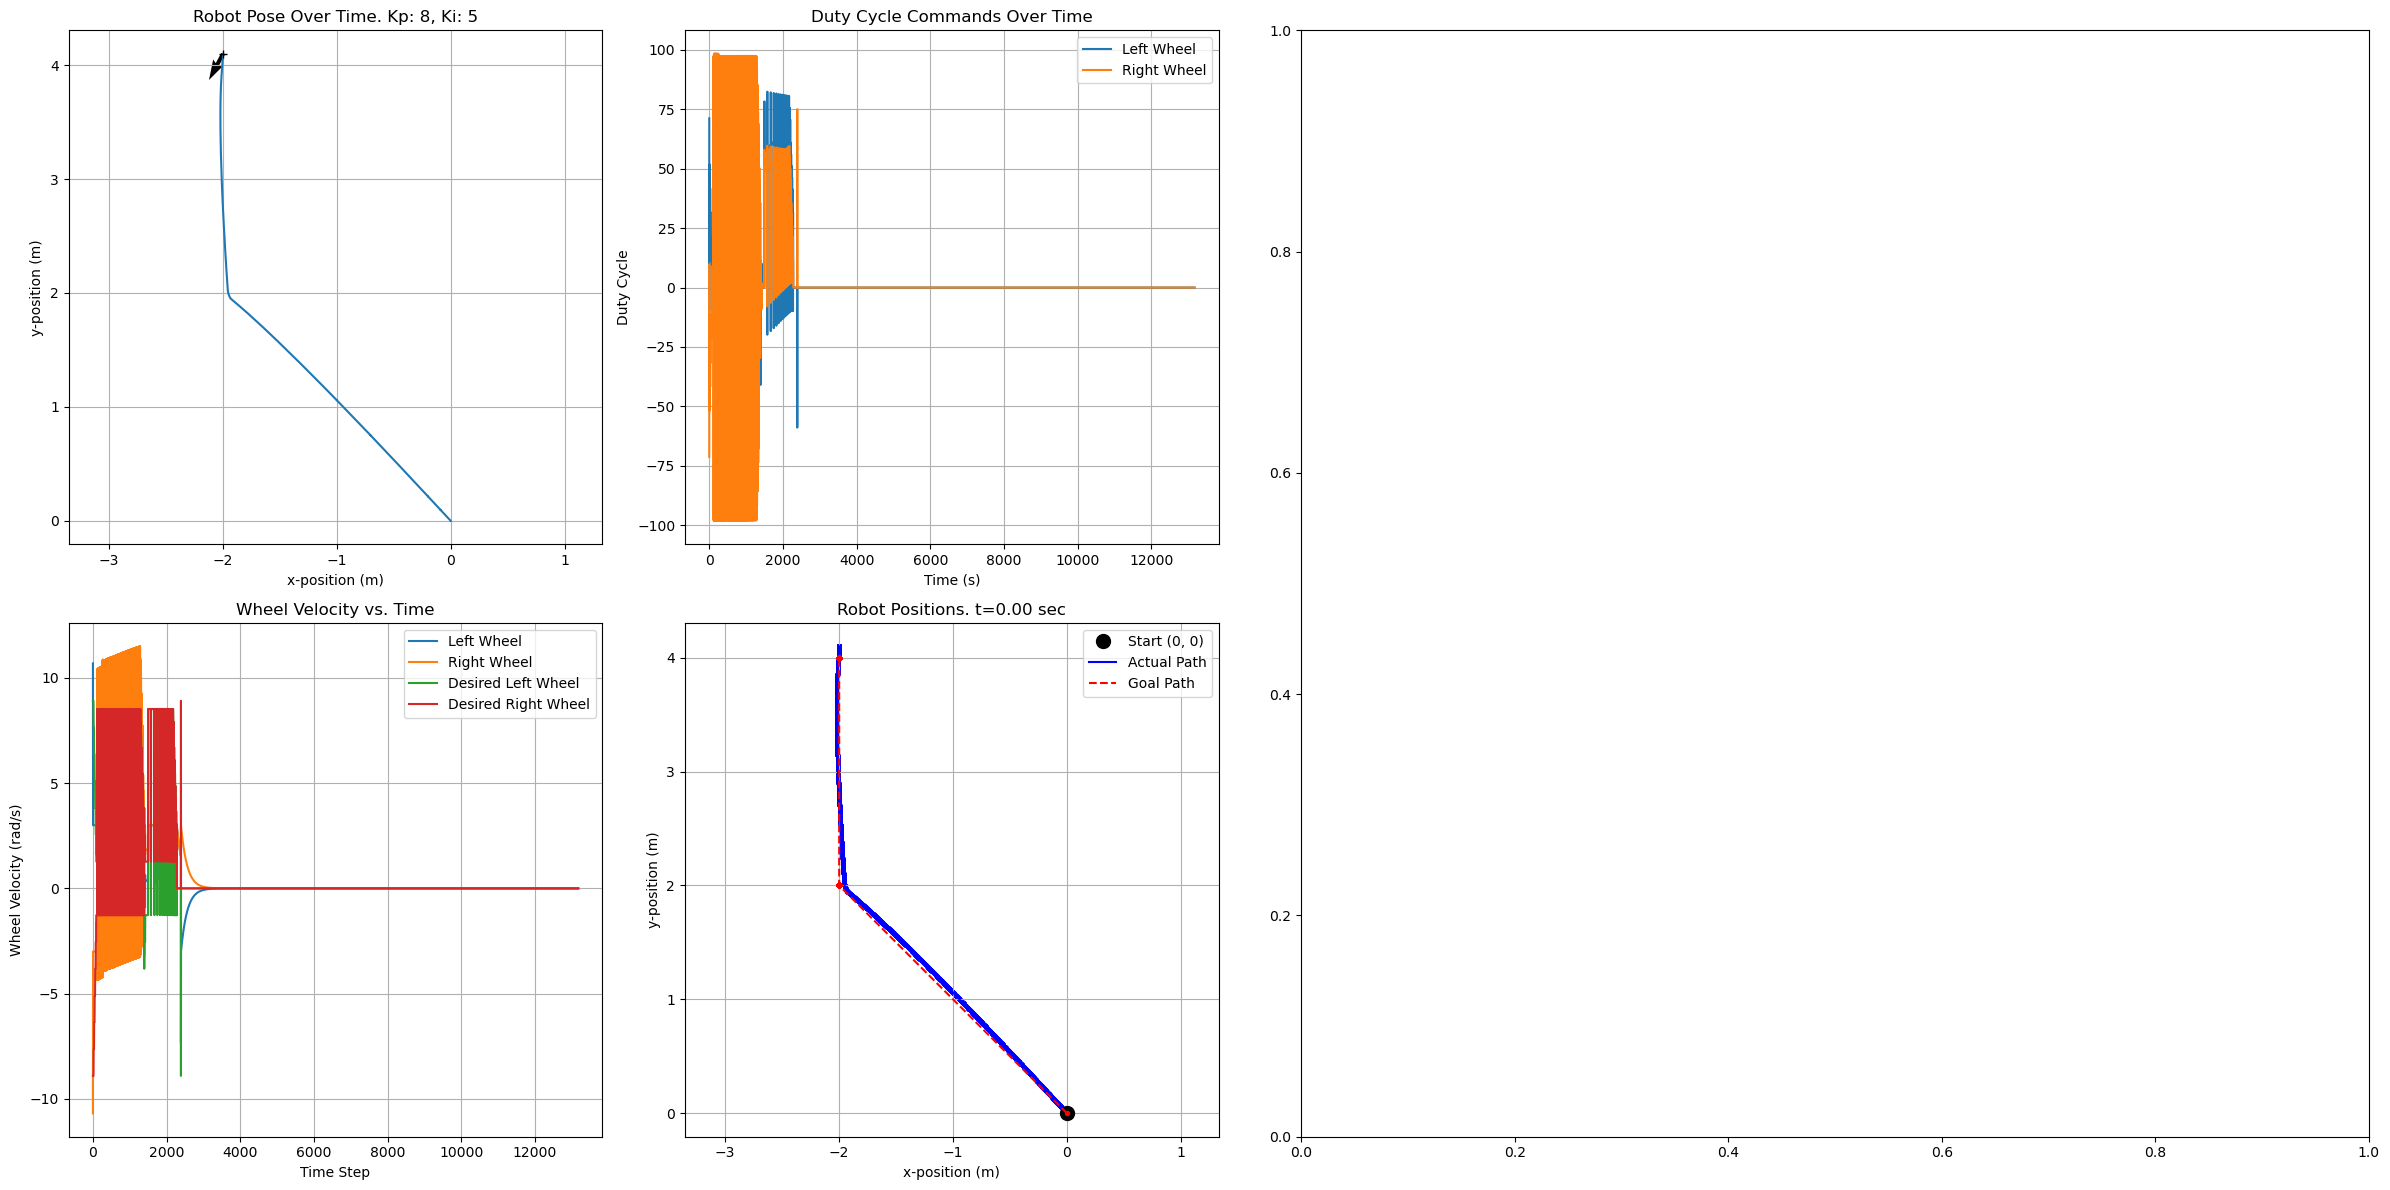

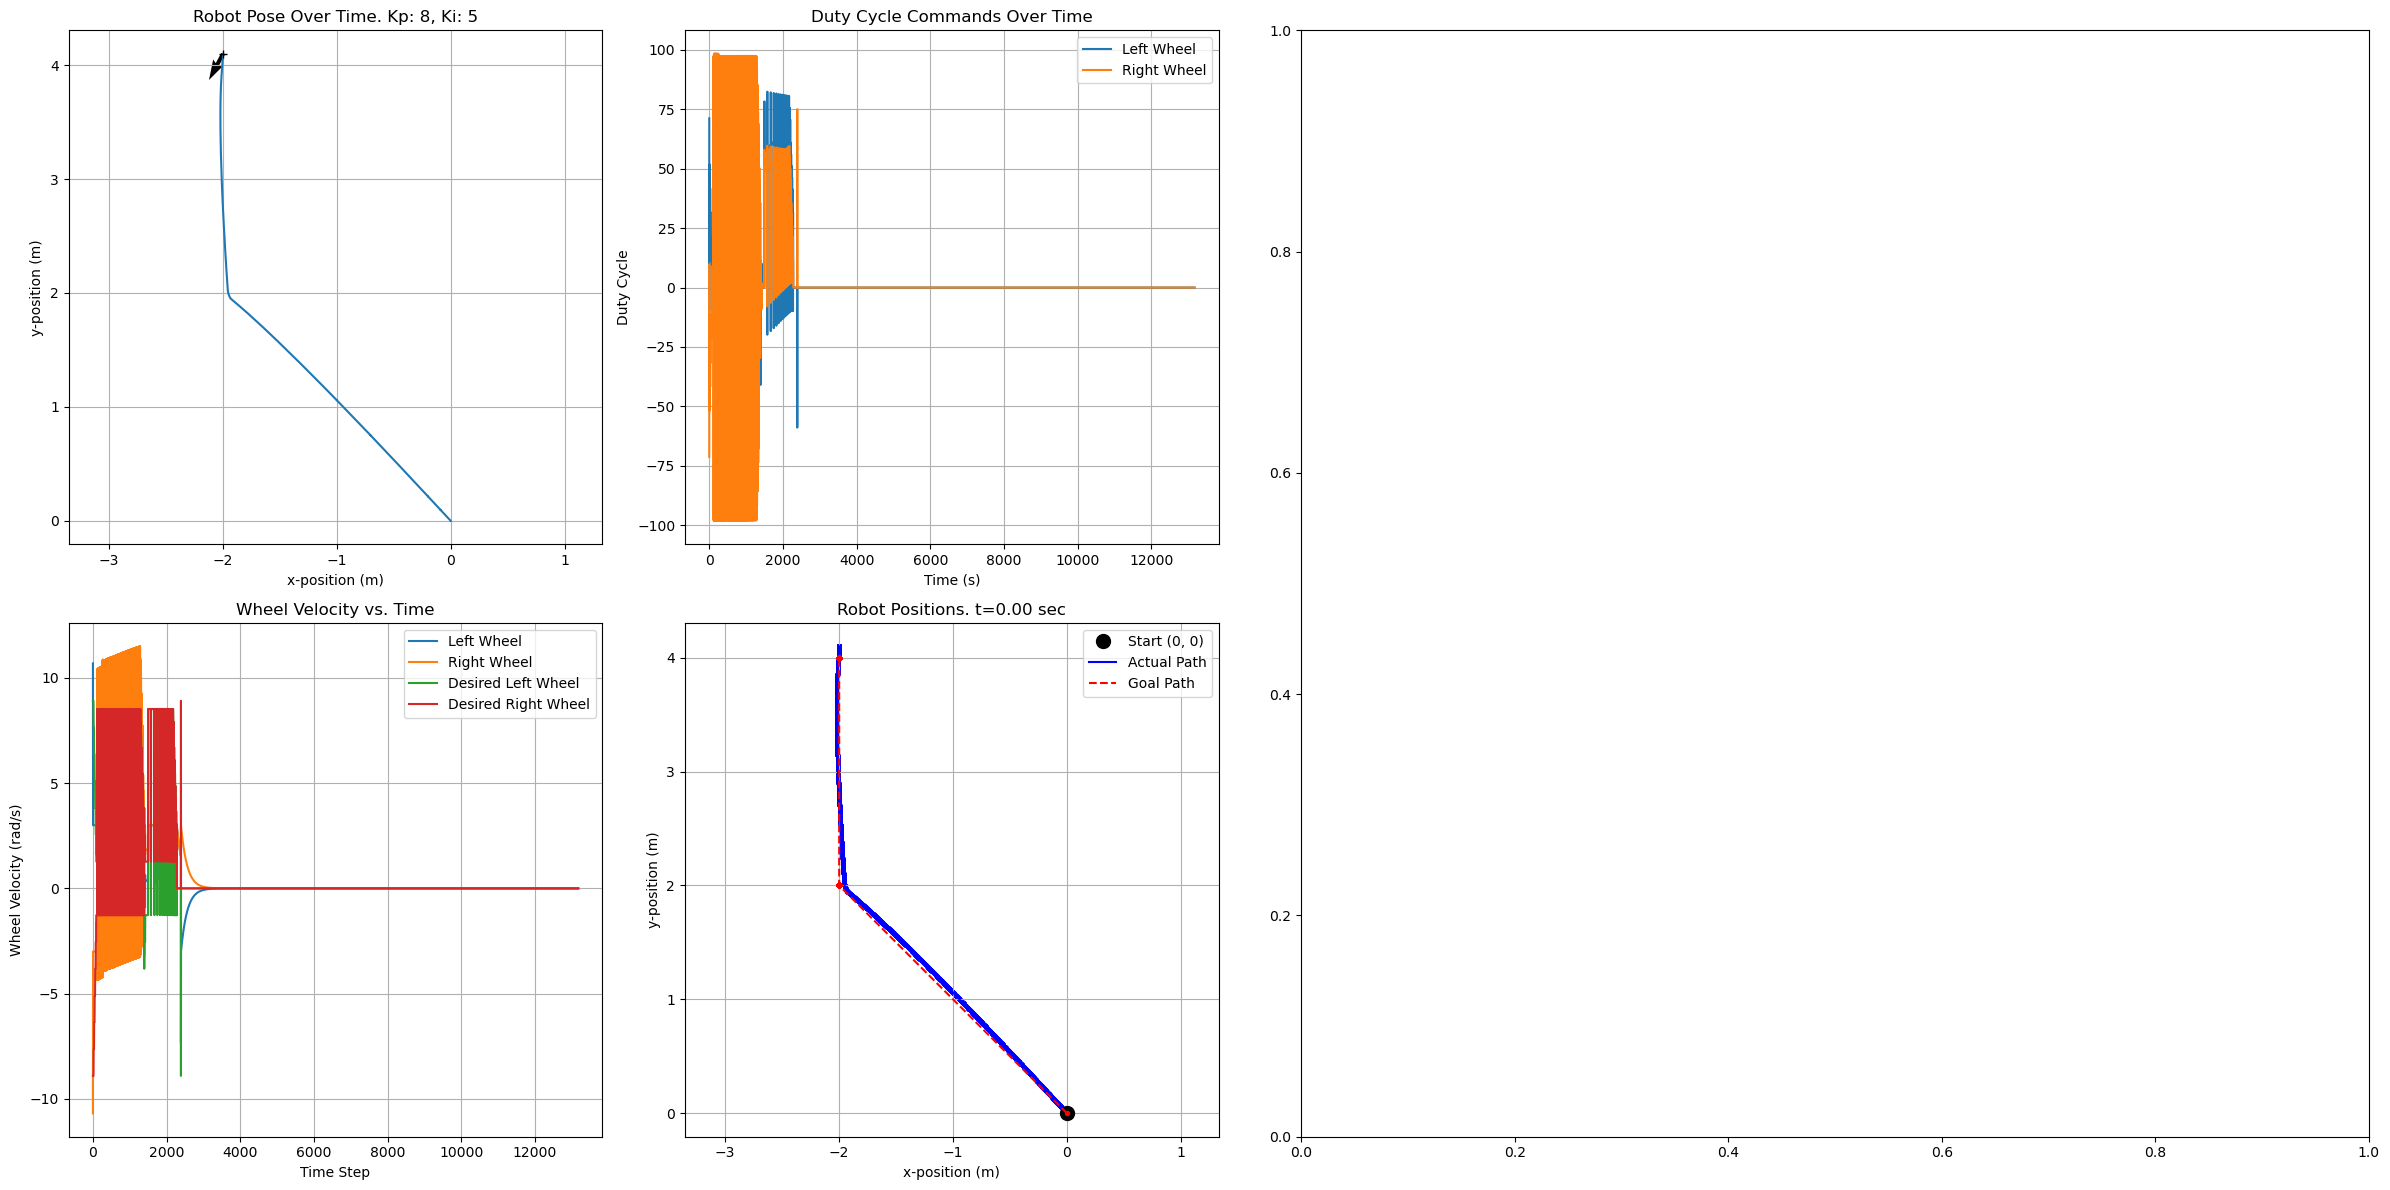

In [1]:
import os, sys
# print(f"{os.getcwd()}")
# sys.path.append(os.getcwd())
current_dir = os.getcwd()
ECE_tenni_dir = os.path.abspath(os.path.join(current_dir, "..", ".."))
print(ECE_tenni_dir)
sys.path.append(ECE_tenni_dir)

try: # Import the GPIO library. If it fails, we assume we are running on a non-Raspberry Pi system.
    import RPi.GPIO as GPIO
    import gpiozero
except ImportError:
    print("Not running on Raspberry Pi. GPIO library not imported.")
    pass

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
plt.ion()  # Turn on interactive mode

from robot_core.coordinator.ProcessCoordinator import Coordinator
from robot_core.utils.robot_plotter import RobotPlotter

###############################################################################

# Set up figure
fig = plt.figure(figsize=(24, 12))

# Create a GridSpec with 2 rows and 3 columns (2x2 grid on the left, and a single large plot on the right)
gs = gridspec.GridSpec(2, 3, width_ratios=[1, 1, 2])  # Width ratio for the right plot should be bigger

# Create the 2x2 subplots
ax1 = plt.subplot(gs[0, 0])  # Top-left
ax2 = plt.subplot(gs[0, 1])  # Top-right
ax3 = plt.subplot(gs[1, 0])  # Bottom-left
ax4 = plt.subplot(gs[1, 1])  # Bottom-right

# Create the large plot on the right, spanning both rows (occupies 2 rows in the 3rd column)
ax5 = plt.subplot(gs[:, 2])  # This spans the entire height (both rows) of the 3rd column


coordinator = Coordinator(simulate=True, fig=fig, axes=[ax1, ax2, ax3, ax4, ax5], live_graphs=True, graph_interval=1, log=False)
coordinator.run()
